In [4]:
import numpy as np
import pandas as pd
import random
import scipy.io as scio
from numpy import genfromtxt
from sklearn.cluster import KMeans
from scipy.spatial import distance
from sklearn.metrics import average_precision_score, precision_recall_curve
import os
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt

In [5]:
os.chdir("/home/sharv/Projects/Kmeans/KMeans_Experiments/")
from KmeansPPcenters import KMeanPlusPlus
from Gonzalez_centers import Gonzalez
from KMeansOut import kmeansOutliers, cost
from Noise import add_random_noise, compute_phi_star, cost
from Lloyd import Lloyd

os.chdir("/home/sharv/Projects/Kmeans/KMeans_Experiments/Tests/")

In [6]:
Data4, labels4 = make_blobs(n_samples=1000, centers=[[0,0], [10, 20], [0, 20],[10,0]],cluster_std=0.5, n_features=2, random_state=0)

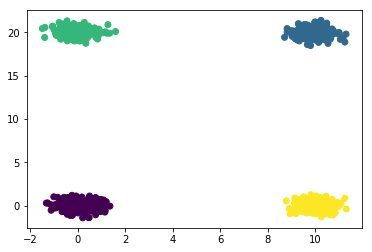

In [7]:
plt.scatter(Data4[:,0], Data4[:,1], c=labels4)

In [8]:
Data3, labels3 = make_blobs(n_samples=50, centers=[[0,0], [5, 10], [10, 0]],cluster_std=0.5, n_features=2, random_state=0)

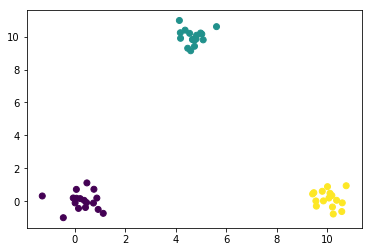

In [9]:
plt.scatter(Data3[:,0], Data3[:,1], c=labels3)

In [10]:
outliers=[[5,50], [10, -50], [0, -50], [5, -90], [10,-90]]
Data_with_outliers= np.append(Data3, outliers, axis=0) 
labels_out= [10, 10, 10, 10, 10]
labels_with_outliers= np.append(labels3, labels_out, axis=0) 
labels_with_outliers

array([ 2,  0,  2,  1,  1,  0,  2,  0,  2,  0,  1,  1,  0,  1,  1,  2,  1,
        1,  1,  0,  1,  0,  2,  0,  1,  2,  2,  0,  0,  2,  2,  2,  0,  2,
        2,  2,  0,  1,  0,  2,  1,  0,  1,  0,  0,  1,  1,  0,  2,  1, 10,
       10, 10, 10, 10])

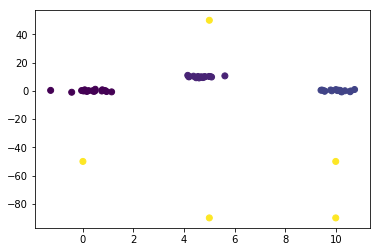

In [40]:
plt.scatter(Data_with_outliers[:,0], Data_with_outliers[:,1], c=labels_with_outliers)

In [41]:
num_clusters=[3]
z =5
Data_with_outliers= Data3

for num_cluster in num_clusters:
    print("num_cluster:{}, z:{}".format(num_cluster, z))
    #=100
    #print("KPP initilization to calculate phi_star")
    np.random.seed(1)
    #init= Data_with_outliers[np.random.choice(np.arange(len(Data_with_outliers)-1), 1)]
    init=Data_with_outliers[0]
    #print(init)
    KPP=KMeanPlusPlus(num_clusters=num_cluster, init=init)
    KPP.fit(Data_with_outliers)
    #phi_star= compute_phi_star(Data4,num_cluster, KPP.centers, z)
    phi_star= np.inf
    print("KPP_centers:{}".format(KPP.centers))
    #print("Phi_star: {}".format(phi_star))
    
    #print("Calculating KMO")
    centers, cid, dist= kmeansOutliers(Data_with_outliers, phi_star, z, num_cluster)
    print("KMO_centers :{}".format(centers))
    costs, z_alg = cost(Data_with_outliers, cid, centers, z)
    #print(costs)
    #print(z_alg)
    #print(costs)
    #print(type(costs))
    #print(costs[z_alg])
    #print(np.unique(cid))
    #print("Actual_outliers:{}, Calculated_outliers:{}". format(z_indx, z_alg))
    #z_indx= [500, 501, 502, 503, 504]
    z_indx=[0,1,2,3,4]
    print("Z_alg:{}".format(z_alg))
    #print("Calculating precision and recall")
    precision = len(np.intersect1d(z_indx, z_alg))/len(z_indx)
    recall = len(np.intersect1d(z_indx, z_alg))/len(z_alg)

    #x1= KPP.predict(data_with_outliers)
    #x2= cid
    #precision = len(x1)/(len(x1)+ len(np.setdiff1d(x1, x2)))
    #recall= len(x1)/(len(x1)+ len(np.setdiff1d(x2, x1)))
    #print(x1)
    #print(cid)
    print(("Precision:{}, recall:{}". format(precision, recall)))
    #print("centers: {}, cid: {}, dist: {}".format(centers, cid, dist))
    #print("Next")
    


num_cluster:3, z:5
KPP_centers:[[10.10413749  0.48831952]
 [ 0.74703954 -0.10257913]
 [10.23283122 -0.76812184]]
KMO_centers :[[10.10413749  0.48831952]
 [ 0.74703954 -0.10257913]
 [10.23283122 -0.76812184]]
Z_alg:[10 14 46 40 16]
Precision:0.0, recall:0.0


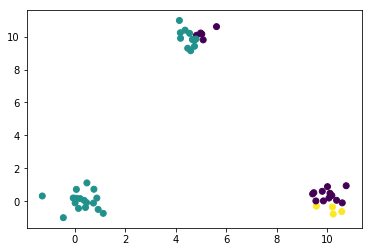

In [42]:
plt.scatter(Data_with_outliers[:,0], Data_with_outliers[:,1], c=cid)

num_cluster:3, z:3
centers:[[ 5.08871307  9.79910953]
 [ 9.79841153  0.61122254]
 [-0.44389287 -0.99039823]]
0
[23  1 36]
Old centers:[[ 5.08871307  9.79910953]
 [ 9.79841153  0.61122254]
 [-0.44389287 -0.99039823]]
New centers:[[ 4.68891898  9.97833405]
 [10.04302666  0.15522263]
 [ 0.26373746 -0.15194693]]
1
[46 36 28]
Old centers:[[ 4.72279736  9.9160182 ]
 [10.04302666  0.15522263]
 [ 0.38714871 -0.06615001]]
New centers:[[ 4.72279736  9.9160182 ]
 [10.04302666  0.15522263]
 [ 0.38714871 -0.06615001]]
Precision:0.0, recall:0.0


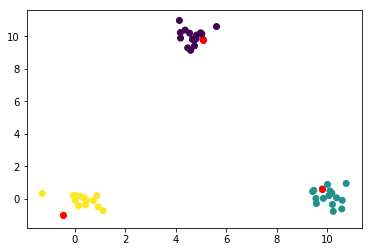

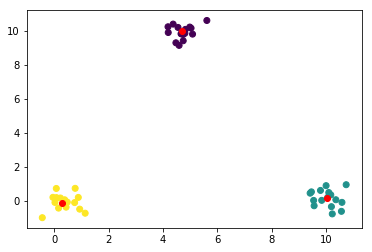

In [67]:
%matplotlib inline 
Data_with_outliers=Data3
num_clusters=[3]
zs=[3]
itr=100
tol=.5
for num_cluster in num_clusters:
    for z in zs:
      
        #Step 1: Adding noise
        #random.seed(z)
        print("num_cluster:{}, z:{}".format(num_cluster, z))
        #data_with_outliers, z_indx = add_random_noise_th(data, z, min_value, max_value)
        #data_inliers= np.delete(data, z_indx, axis=0)

        #Step 2:random intialization for KPP
        random_indx= random.randint(0, len(Data_with_outliers)-1)
        init=Data_with_outliers[random_indx]
        #init=Data_with_outliers[0]

        # Step 3: KPP initialization for LLoyd
        KPP=KMeanPlusPlus(num_clusters=num_cluster, init=init)
        KPP.fit(Data_with_outliers)
        centers= KPP.centers
        #centers= Data_with_outliers[np.random.choice(np.arange(len(Data_with_outliers)-1), num_cluster)]
        #centers= Data_with_outliers[[3,4,10, 11, 13]]
        print("centers:{}".format(centers))
        #print(type(centers))
        #print(centers.shape)
        new_centers=np.zeros((num_cluster, 2))
        #print("new_centers init:{}".format(new_centers))
        #convergence of LLoyd

        for i in range(itr):
            print(i)
            #centers= Data_with_outliers[np.random.choice(np.arange(len(Data_with_outliers)-1), num_cluster)]
            #centers= skin_data[np.random.choice(np.arange(len(data_with_outliers)-1), size= 10)]
            #Step 4: Compute distance between all centers and points 
            dist= distance.cdist(Data_with_outliers, centers)
            dist = np.amin(dist, axis = 1)

            #Step 5: Remove furthest z points
            indx_list = np.argpartition(dist, -z)[-z:]
            data_new = np.delete(Data_with_outliers, indx_list, axis=0)
            print(indx_list)

            #Step 6: Compute distance with data_new and centers & save the index of min distance in cid
            dist_new = distance.cdist(data_new, centers)
            cid = np.argmin(dist_new, axis=1)
            dist_new = np.amin(dist_new, axis = 1)
            plt.figure()
            plt.scatter(data_new[:,0], data_new[:,1], c=cid)
            plt.scatter(centers[:,0], centers[:,1], marker='o', color= 'red')
            #Step 7: Compute new centers as mean of data points in each clusters
            for j in range(num_cluster):
                if len(data_new[cid==j])>0:
                    new_centers[j]= np.mean(data_new[cid==j], axis=0)
                    #print(new_centers[j])
            #print("New centers now:{}".format(new_centers))
            #new_centers= skin_data[np.random.choice(np.arange(len(data_with_outliers)-1), size= 10)]



            #Generate set them as new centers
            old_centers= centers
            print("Old centers:{}".format(old_centers))
            centers= new_centers
            print("New centers:{}".format(new_centers))

            #Step 8: Check the difference in the set of centers
            isOPTIMAL= True

            if (len(np.setdiff1d(new_centers,old_centers)))>tol:
                isOPTIMAL= False

            #Step 9: Stop if value less than tolerence
            if isOPTIMAL:
                break


        #Step 10: Compute precision and recall
        #z_indx : Actual outliers
        precision = len(np.intersect1d(z_indx, indx_list))/len(z_indx)
        recall = len(np.intersect1d(z_indx, indx_list))/len(indx_list)

        #Step 11: Cost
        #LO_cost, index= cost(data_with_outliers, cid, centers, len(indx_list))
        #print(LO_cost)
        #x1= KPP.predict(data_with_outliers)
        print(("Precision:{}, recall:{}". format(precision, recall)))


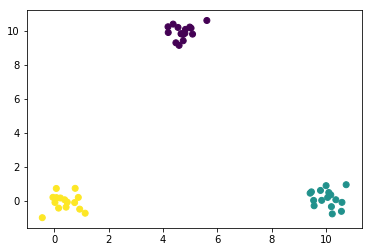

In [68]:
 plt.scatter(data_new[:,0], data_new[:,1], c=cid)

In [14]:
%matplotlib inline 
Data_with_outliers=Data3
num_clusters=[3]
zs=[3]
itr=100
tol=.5
for num_cluster in num_clusters:
    for z in zs:
        print("num_cluster:{}, z:{}".format(num_cluster, z))
        LLD=Lloyd(num_clusters=3, tol=.1, max_itr=10)
        LLD.fit(Data_with_outliers)    
        #LLD.clusters 
        print(LLD.centers)
        #Step 1: Adding noise
        #random.seed(z)
        
        #data_with_outliers, z_indx = add_random_noise_th(data, z, min_value, max_value)
        #data_inliers= np.delete(data, z_indx, axis=0)

        #Step 2:random intialization for KPP
        #random_indx= random.randint(0, len(Data_with_outliers)-1)
        #init=Data_with_outliers[random_indx]
        #init=Data_with_outliers[0]

        # Step 3: KPP initialization for LLoyd
        #KPP=KMeanPlusPlus(num_clusters=num_cluster, init=init)
        #KPP.fit(Data_with_outliers)
        #centers= KPP.centers
        #centers= Data_with_outliers[np.random.choice(np.arange(len(Data_with_outliers)-1), num_cluster)]
        #centers= Data_with_outliers[[3,4,10, 11, 13]]
        #print("centers:{}".format(centers))
        #print(type(centers))
        #print(centers.shape)
        #new_centers=np.zeros((num_cluster, 2))
        #print("new_centers init:{}".format(new_centers))
        #convergence of LLoyd

       

num_cluster:3, z:3
5.020776166335844
3.615182983520275
6.467765201163748
5.049330597157233
0.16103266393147483
7.250982563564921
5.099124643738439
0.16103266393147483
7.333626517747766
5.099124643738439
0.16103266393147483
7.333626517747766
{0: 5.099124643738439, 1: 0.16103266393147483, 2: 7.333626517747766}


In [12]:
Data_with_outliers[1]

array([0.76638961, 0.73467938])